# Are train delays correlated to how the weather is?

### Note:
- To get a successful experiment/results we should consider a full year's data to capture all seasons. Since now (06.2023) is summer, the weather isn't an issue, which can also helps, if there are many delays with a good weather, then it is due to another reason/s not from the weather, and this will be refactored from the whole year analysis.

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_sql("select * from weather_train_delay", "sqlite:///data.sqlite").drop(['planned_next_stations', 'changed_next_stations', 'EVA_NR'], axis=1)
cols = ['date', 'Bundesland', 'train_station_name', 'weather_station_name', 'train_station_laenge',
       'train_station_breite', 'weather_station_laenge', 'weather_station_breite', 'temperature', 'delay',
        'planned_arrival', 'changed_arrival', 'planned_departure', 
       'changed_departure',  'arrival_difference', 'departure_difference',
       'arrival_difference_minuit', 'departure_difference_minuit', 
       ]
df = df[cols]
df

,date,Bundesland,train_station_name,weather_station_name,train_station_laenge,train_station_breite,weather_station_laenge,weather_station_breite,temperature,delay,planned_arrival,changed_arrival,planned_departure,changed_departure,arrival_difference,departure_difference,arrival_difference_minuit,departure_difference_minuit
0,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,1,2023-06-23 16:10:00,2023-06-23 16:12:00,2023-06-23 16:10:00,2023-06-23 16:13:00,0 days 00:02:00,0 days 00:03:00,2.0,3.0
1,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,1,2023-06-23 16:00:00,2023-06-23 16:05:00,2023-06-23 16:00:00,2023-06-23 16:05:00,0 days 00:05:00,0 days 00:05:00,5.0,5.0
2,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,0,2023-06-23 16:24:00,2023-06-23 16:25:00,2023-06-23 16:24:00,2023-06-23 16:25:00,0 days 00:01:00,0 days 00:01:00,0.0,0.0
3,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,0,2023-06-23 16:42:00,2023-06-23 16:42:00,2023-06-23 16:43:00,2023-06-23 16:43:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
4,2023-06-23,Bayern,Hamburg Elbbrücken,Sandberg,10.024500,53.534500,10.0034,50.3518,15.3,1,2023-06-23 16:04:00,2023-06-23 16:08:00,2023-06-23 16:04:00,2023-06-23 16:08:00,0 days 00:04:00,0 days 00:04:00,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2023-06-23,Baden-Württemberg,Einbeck Otto-Hahn-Straße,Wolfach,9.892910,51.814478,8.2391,48.2953,19.2,0,2023-06-25 16:21:00,2023-06-25 16:21:00,2023-06-25 16:21:00,2023-06-25 16:21:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
244,2023-06-23,Baden-Württemberg,Nörvenich-Rommelsheim,Wolfach,6.547586,50.782539,8.2391,48.2953,19.2,0,2023-06-25 15:00:00,2023-06-25 15:00:00,2023-06-25 15:00:00,2023-06-25 15:00:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
245,2023-06-23,Baden-Württemberg,Nörvenich-Rommelsheim,Wolfach,6.547586,50.782539,8.2391,48.2953,19.2,0,2023-06-25 15:28:00,2023-06-25 15:28:00,2023-06-25 15:29:00,2023-06-25 15:29:00,0 days 00:00:00,0 days 00:00:00,0.0,0.0
246,2023-06-23,Baden-Württemberg,Nörvenich-Rommelsheim,Wolfach,6.547586,50.782539,8.2391,48.2953,19.2,0,2023-06-25 16:00:00,2023-06-25 16:01:00,2023-06-25 16:00:00,2023-06-25 16:01:00,0 days 00:01:00,0 days 00:01:00,0.0,0.0


## What is the correlation between the delayed trains and the corresponding day's temperature  

### Continues variable correlation

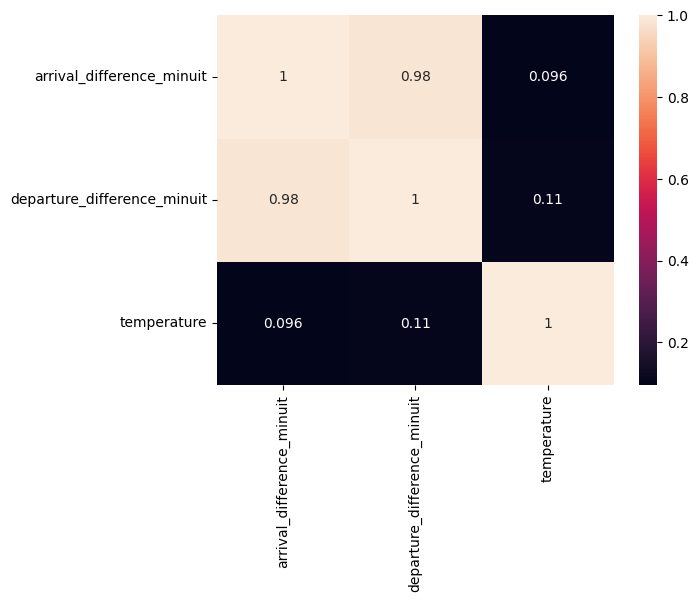

In [3]:
corr_matrix = df[['arrival_difference_minuit', 'departure_difference_minuit', 'temperature']].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

### Categorical & continues variable correlation

In [4]:
a = df['delay']
b = df['temperature']

In [5]:
stats.pointbiserialr(a, b)

SignificanceResult(statistic=-0.017350414549347, pvalue=0.7857183848965182)

#### Pearson product-moment correlation

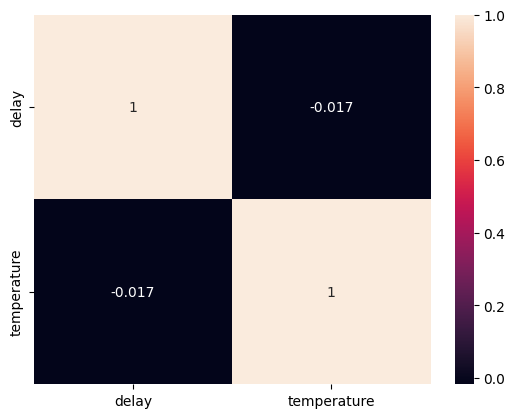

In [6]:
corr_matrix = np.corrcoef(a, b)
sn.heatmap(corr_matrix, annot=True, xticklabels=['delay', 'temperature'], yticklabels=['delay', 'temperature'])
plt.show()